In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('fr_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185012 entries, 0 to 185011
Data columns (total 10 columns):
CUSTOMER_ID         185012 non-null int64
ORDERS              185012 non-null int64
FIRST_ORDER_DATE    185012 non-null object
LAST_ORDER_DATE     185012 non-null object
TOTAL_CM2           185012 non-null object
NET_SALES           185012 non-null object
CM2_REL             185012 non-null object
ZTQ_ID              185012 non-null int64
START_DATE          185012 non-null object
EXPIRY_DATE         185012 non-null object
dtypes: int64(3), object(7)
memory usage: 14.1+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,14214868,3,2017-06-01,2017-09-17,14.7193,146.4166,10.05,51,2016-10-04,2017-10-04
1,14050803,5,2017-06-01,2018-04-11,15.2298,200.7670,7.59,52,2017-06-01,2020-06-01
2,9386203,11,2017-06-01,2018-04-10,40.3094,273.6003,14.73,52,2016-05-30,2019-05-30
3,12538426,12,2017-06-01,2018-05-27,147.1829,988.9834,14.88,52,2016-12-05,2019-12-05
4,4263432,9,2017-06-01,2018-04-08,168.2180,1289.4311,13.05,51,2018-04-08,2019-04-24


In [11]:
tiers = [51, 52, 53, 54, 55, 56, 153, 154, 155, 156]

...........................................................TIER  51 ..........................................................


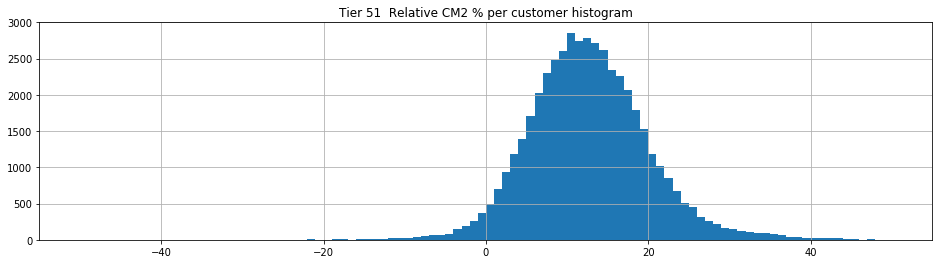

,CM2_REL
count,47478.00
mean,12.66
std,7.43
min,-116.13
25%,7.89
50%,12.32
75%,17.02
max,84.14


CM2% threshold >= 5  is the percentile 12.87
CM2% threshold >= 7  is the percentile 20.73
CM2% threshold >=  8.86  is the percentile 30 allowing us to stay with the 70% of our sample


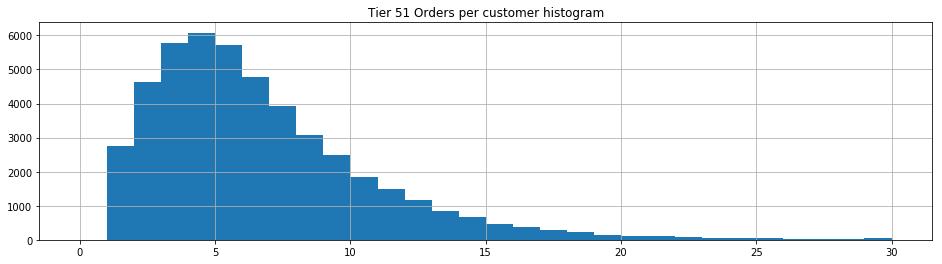

,ORDERS
count,47478.00
mean,6.29
std,4.47
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,65.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  64.36  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  58.68  % from our customers
With CM2% threshold >=  8.86  and Orders >=  4.0  we keep eligible a  51.87  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


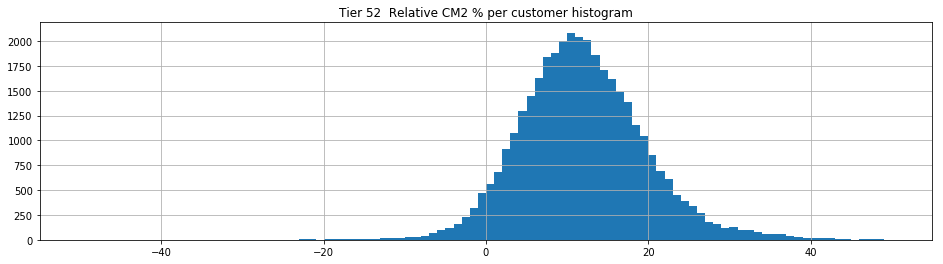

,CM2_REL
count,36266.00
mean,11.87
std,8.39
min,-515.43
25%,6.86
50%,11.50
75%,16.54
max,90.23


CM2% threshold >= 5  is the percentile 17.23
CM2% threshold >= 7  is the percentile 25.71
CM2% threshold >=  7.85  is the percentile 30 allowing us to stay with the 70% of our sample


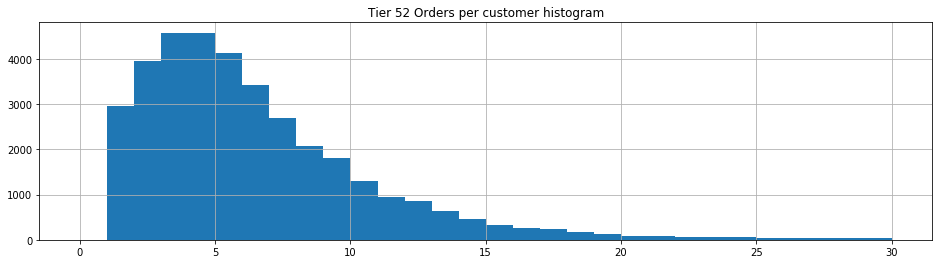

,ORDERS
count,36266.00
mean,6.13
std,5.14
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,338.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  68.03  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  61.0  % from our customers
With CM2% threshold >=  7.85  and Orders >=  3.0  we keep eligible a  57.43  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


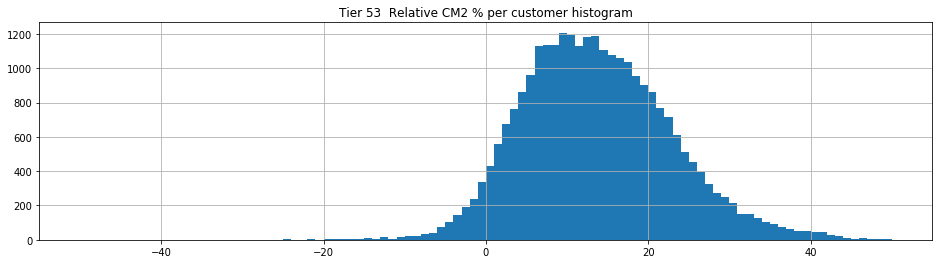

,CM2_REL
count,27414.00
mean,13.60
std,13.89
min,-1702.59
25%,7.16
50%,13.04
75%,19.51
max,79.70


CM2% threshold >= 5  is the percentile 16.7
CM2% threshold >= 7  is the percentile 24.34
CM2% threshold >=  8.378999999999998  is the percentile 30 allowing us to stay with the 70% of our sample


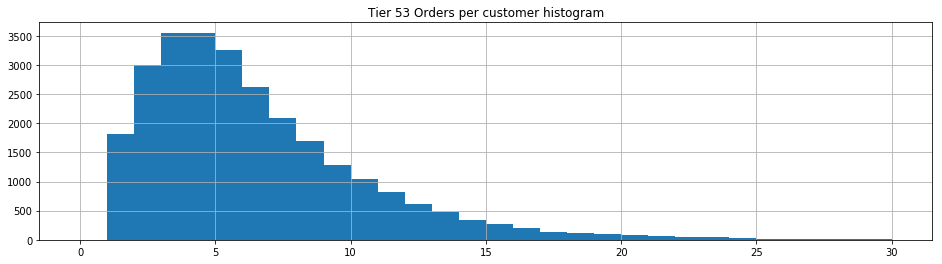

,ORDERS
count,27414.00
mean,6.10
std,4.53
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,86.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  69.6  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  63.18  % from our customers
With CM2% threshold >=  8.378999999999998  and Orders >=  3.0  we keep eligible a  58.38  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


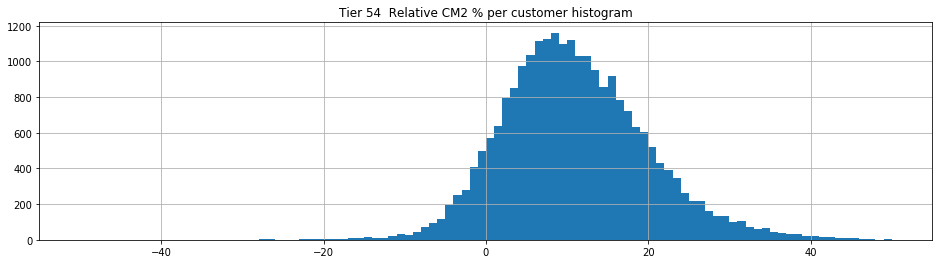

,CM2_REL
count,23658.00
mean,11.00
std,9.12
min,-167.07
25%,4.94
50%,10.31
75%,16.39
max,81.46


CM2% threshold >= 5  is the percentile 25.21
CM2% threshold >= 7  is the percentile 34.31
CM2% threshold >=  6.08  is the percentile 30 allowing us to stay with the 70% of our sample


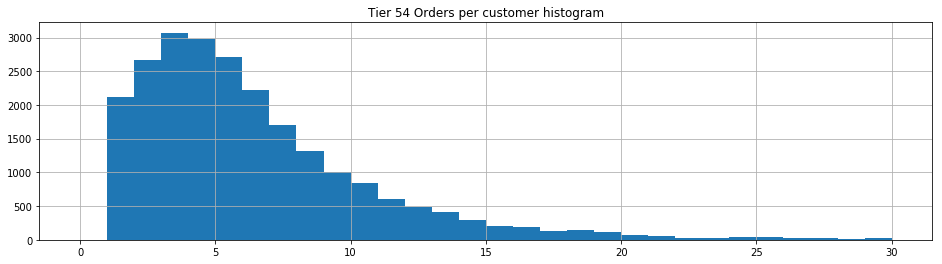

,ORDERS
count,23658.00
mean,6.04
std,4.99
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,136.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  60.3  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  52.7  % from our customers
With CM2% threshold >=  6.08  and Orders >=  3.0  we keep eligible a  56.31  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


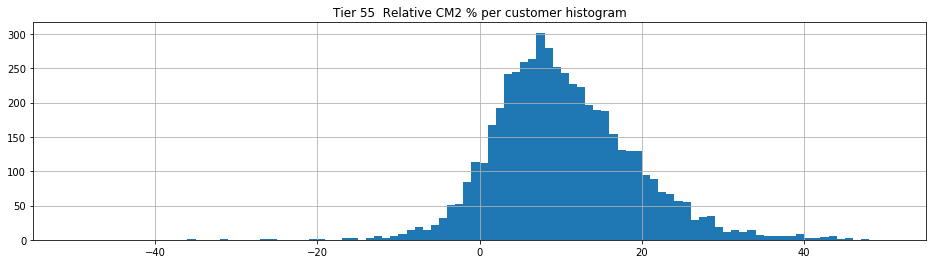

,CM2_REL
count,5220.00
mean,10.37
std,8.66
min,-52.91
25%,4.68
50%,9.42
75%,15.42
max,99.64


CM2% threshold >= 5  is the percentile 26.74
CM2% threshold >= 7  is the percentile 36.76
CM2% threshold >=  5.64  is the percentile 30 allowing us to stay with the 70% of our sample


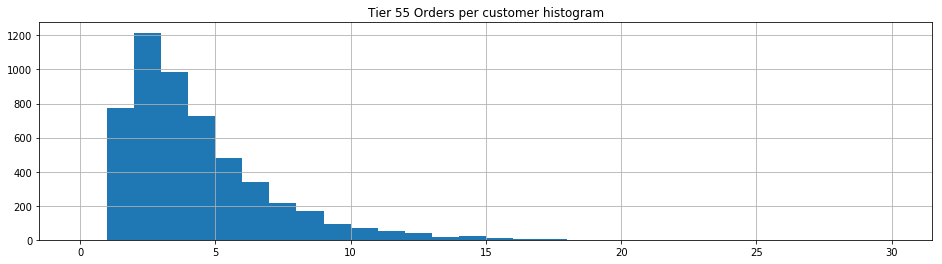

,ORDERS
count,5220.00
mean,3.80
std,2.66
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,39.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  62.36  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  53.79  % from our customers
With CM2% threshold >=  5.64  and Orders >=  2.0  we keep eligible a  59.71  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


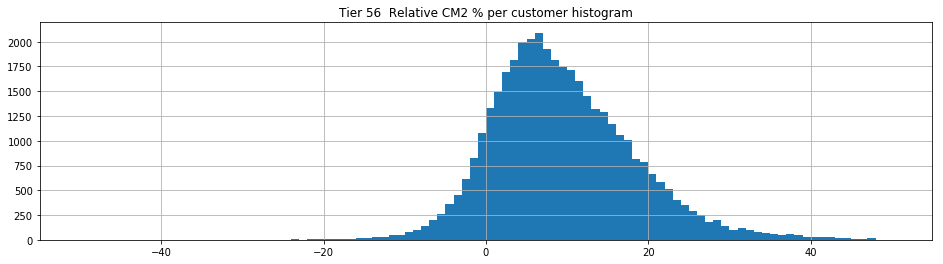

,CM2_REL
count,38992.00
mean,9.44
std,8.89
min,-126.01
25%,3.47
50%,8.39
75%,14.62
max,77.83


CM2% threshold >= 5  is the percentile 32.62
CM2% threshold >= 7  is the percentile 43.18
CM2% threshold >=  4.482999999999993  is the percentile 30 allowing us to stay with the 70% of our sample


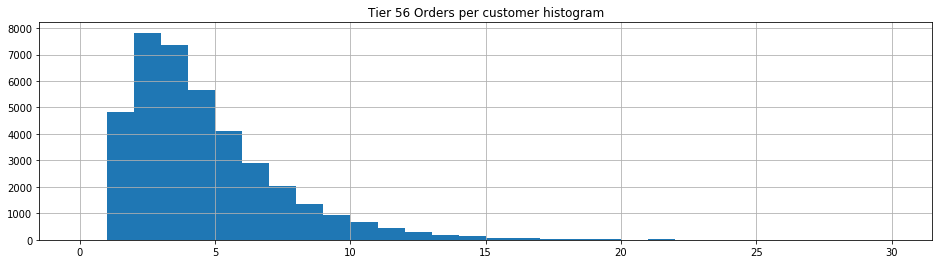

,ORDERS
count,38992.00
mean,4.14
std,2.88
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,71.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  58.69  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  49.16  % from our customers
With CM2% threshold >=  4.482999999999993  and Orders >=  2.0  we keep eligible a  61.05  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  153 ..........................................................


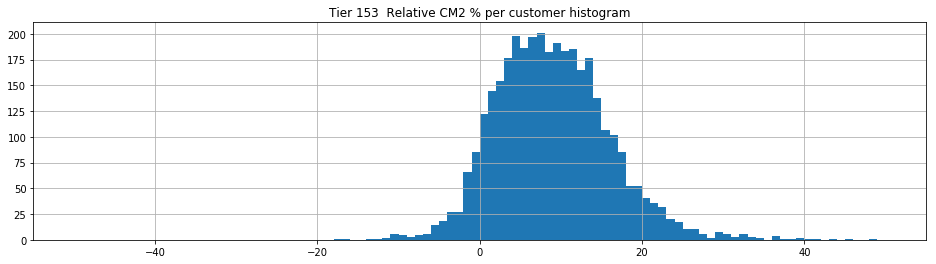

,CM2_REL
count,3479.00
mean,8.97
std,7.09
min,-17.54
25%,4.04
50%,8.56
75%,13.26
max,48.05


CM2% threshold >= 5  is the percentile 30.53
CM2% threshold >= 7  is the percentile 41.53
CM2% threshold >=  4.92  is the percentile 30 allowing us to stay with the 70% of our sample


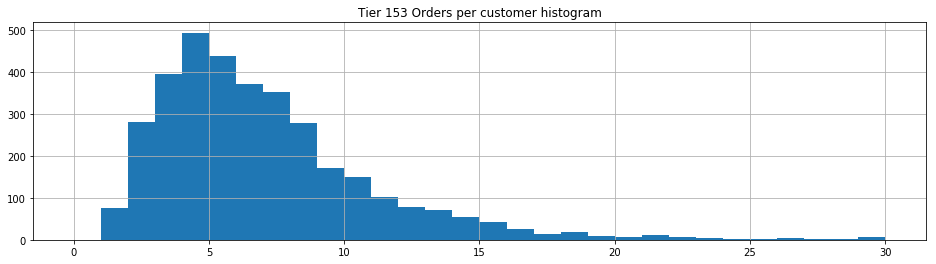

,ORDERS
count,3479.00
mean,6.66
std,4.76
min,1.00
25%,4.00
50%,6.00
75%,8.00
max,90.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  56.05  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  47.69  % from our customers
With CM2% threshold >=  4.92  and Orders >=  4.0  we keep eligible a  56.51  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  154 ..........................................................


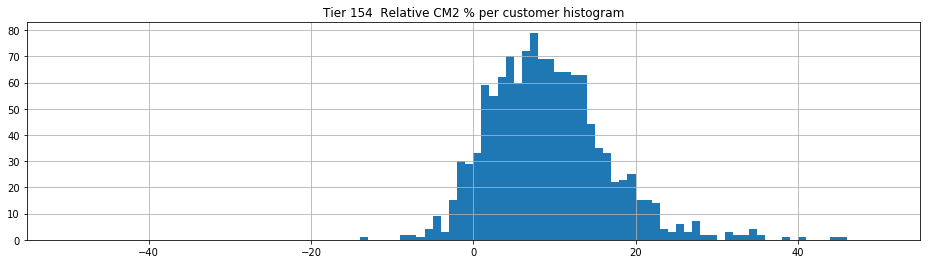

,CM2_REL
count,1248.00
mean,9.22
std,7.29
min,-13.75
25%,4.08
50%,8.50
75%,13.25
max,45.37


CM2% threshold >= 5  is the percentile 30.05
CM2% threshold >= 7  is the percentile 40.62
CM2% threshold >=  4.972999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


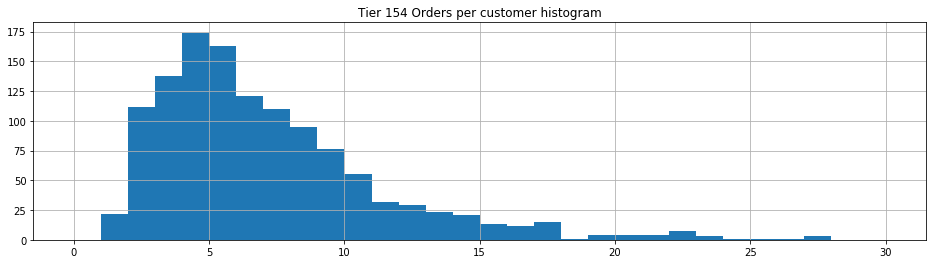

,ORDERS
count,1248.00
mean,6.92
std,5.52
min,1.00
25%,4.00
50%,6.00
75%,9.00
max,69.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  56.49  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  48.0  % from our customers
With CM2% threshold >=  4.972999999999999  and Orders >=  4.0  we keep eligible a  56.49  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  155 ..........................................................


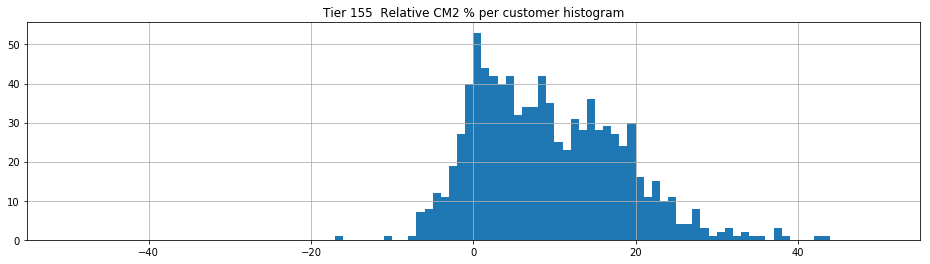

,CM2_REL
count,905.00
mean,9.16
std,8.81
min,-16.91
25%,2.05
50%,8.16
75%,15.34
max,43.43


CM2% threshold >= 5  is the percentile 38.45
CM2% threshold >= 7  is the percentile 45.75
CM2% threshold >=  3.1499999999999995  is the percentile 30 allowing us to stay with the 70% of our sample


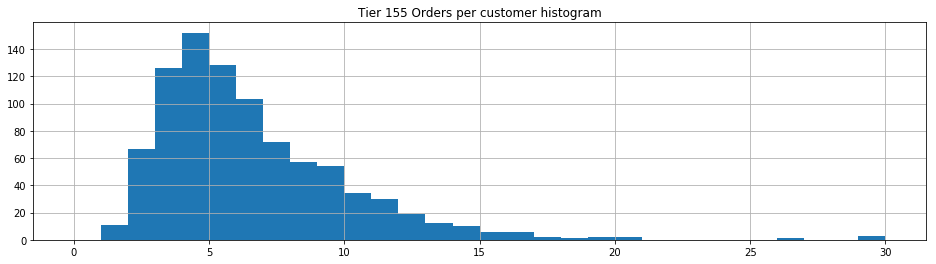

,ORDERS
count,905.00
mean,6.32
std,4.50
min,1.00
25%,4.00
50%,5.00
75%,8.00
max,47.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  49.61  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  44.09  % from our customers
With CM2% threshold >=  3.1499999999999995  and Orders >=  4.0  we keep eligible a  55.47  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  156 ..........................................................


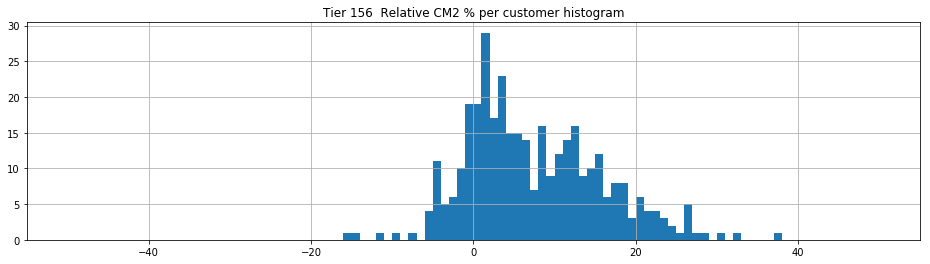

,CM2_REL
count,352.00
mean,7.45
std,8.35
min,-15.85
25%,1.33
50%,5.93
75%,12.74
max,37.06


CM2% threshold >= 5  is the percentile 46.31
CM2% threshold >= 7  is the percentile 54.55
CM2% threshold >=  1.932  is the percentile 30 allowing us to stay with the 70% of our sample


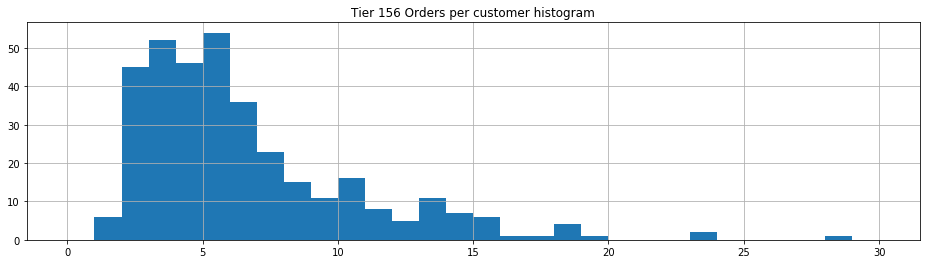

,ORDERS
count,352.00
mean,6.20
std,4.59
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,45.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  38.92  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  34.38  % from our customers
With CM2% threshold >=  1.932  and Orders >=  4.0  we keep eligible a  50.85  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,27895.0,61.797634,26.678193,15.796680,43.736779,55.361083,73.096533,451.298743
52,20024.0,72.175286,32.896416,20.283317,49.856894,64.857267,85.707405,594.745833
53,15533.0,65.662862,29.962249,1.187644,45.763900,59.003667,78.260788,710.271733
54,12779.0,77.587796,41.426057,18.904200,52.711863,70.193522,91.973508,2346.492986
55,2097.0,60.146961,320.670743,18.005060,38.604800,47.266675,61.302075,14697.111083
56,17632.0,63.980043,28.987646,7.581250,44.469747,56.865975,76.084952,674.137020
153,2255.0,64.151240,26.160727,13.870020,45.522607,58.730040,76.829990,347.949960
154,794.0,76.480726,32.590438,28.693750,52.753267,70.044120,88.896642,270.192000
155,600.0,66.969677,29.131550,24.266700,45.722896,60.357769,78.514031,235.847500


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,27895.0,12.707930,6.848893,-22.90,8.1000,12.370,16.850,52.36
52,20024.0,11.755720,7.135047,-16.74,6.9300,11.390,16.130,46.68
53,15533.0,13.694380,16.393744,-1702.59,7.2400,13.090,19.580,58.84
54,12779.0,10.925051,8.515040,-56.57,5.0500,10.110,16.070,50.78
55,2097.0,10.139533,8.108817,-26.01,4.5400,9.160,14.770,99.64
56,17632.0,8.997513,8.054093,-27.04,3.2900,7.915,13.870,55.45
153,2255.0,8.972443,6.965000,-13.52,4.0700,8.480,13.060,48.05
154,794.0,9.210718,7.133678,-13.75,4.2175,8.645,13.190,45.37
155,600.0,9.242900,8.826705,-7.62,1.9825,8.155,15.665,43.43


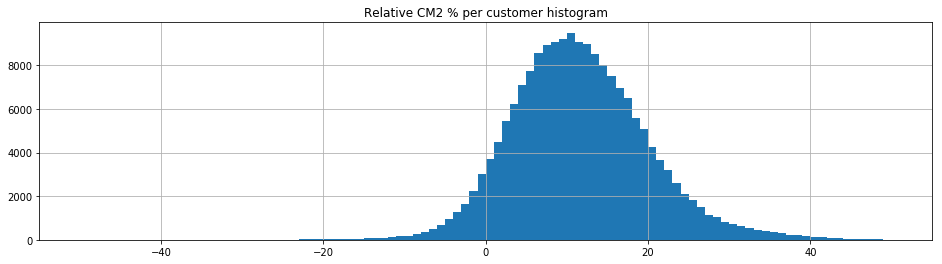

,CM2_REL
count,185012.00
mean,11.57
std,9.48
min,-1702.59
25%,5.94
50%,11.06
75%,16.67
max,99.64


CM2% threshold >= 1  is the percentile 8.47
CM2% threshold >= 2  is the percentile 10.9
CM2% threshold >= 3  is the percentile 13.86
CM2% threshold >= 4  is the percentile 17.23
CM2% threshold >= 5  is the percentile 21.06
CM2% threshold >= 6  is the percentile 25.24
CM2% threshold >= 7  is the percentile 29.87
CM2% threshold >= 8  is the percentile 34.71
CM2% threshold >= 9  is the percentile 39.6
CM2% threshold >= 10  is the percentile 44.58
CM2% threshold >=  7.02  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 1  is the percentile', stats.percentileofscore(data['CM2_REL'], 1, kind='strict').round(2))
print('CM2% threshold >= 2  is the percentile', stats.percentileofscore(data['CM2_REL'], 2, kind='strict').round(2))
print('CM2% threshold >= 3  is the percentile', stats.percentileofscore(data['CM2_REL'], 3, kind='strict').round(2))
print('CM2% threshold >= 4  is the percentile', stats.percentileofscore(data['CM2_REL'], 4, kind='strict').round(2))
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

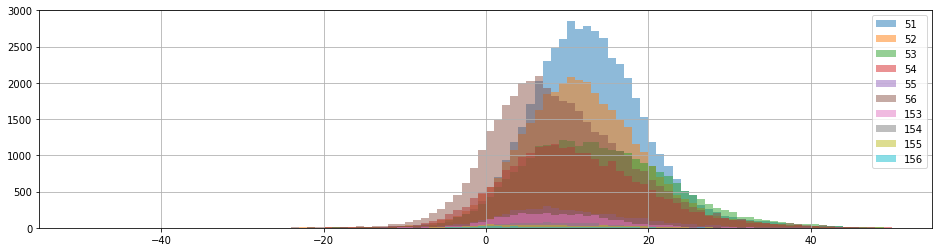

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56, 153, 154, 155, 156])
plt.show()   